In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA,TruncatedSVD,SparsePCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

/storage/home/dzb5732/.conda/envs/thio-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/storage/home/dzb5732/.conda/envs/thio-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
datafile = 'Data/Enzyme_aligned.txt'

enz_names = []
X = []
y = []

with open(datafile,'r') as f:
    for lines in f:
        enz_val = lines.strip('\n').split(',')
        enz_names.append(enz_val[0])
        X.append(list(enz_val[1]))
        y.append(enz_val[2])

In [3]:
smallX = [x[:5] for x in X]

In [4]:
smallXarr = np.array(smallX)

In [5]:
Xarr = np.array(X)

In [6]:
ohe = OneHotEncoder()
ohe.fit(Xarr)


OneHotEncoder()

In [7]:
X_enc = ohe.transform(Xarr).toarray()
y_enc = np.array(y)

In [8]:
lencat = [(ci,lc) for ci,lc in zip(range(len(ohe.categories_)),list(map(len,ohe.categories_)))]

In [9]:
catnummap = {}

currval = 0
nextval = 0

for i,j in lencat:
    nextval += j
    catnummap[i] = list(range(currval,nextval))
    currval=nextval
    

In [10]:
numcatmap = {num:cat for cat,nums in catnummap.items() for num in nums}

In [11]:
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif,chi2

skbest = SelectKBest(score_func=chi2)
skbest.fit(X_enc,y_enc)

SelectKBest(score_func=<function chi2 at 0x2b4b0ee2cae8>)

In [12]:
np.argsort(skbest.scores_)[:50]

array([1336, 1240,  644, 1257,  632, 1332, 1333, 1334, 1335,  631,  621,
       1365, 1370,  585, 1548,  580, 1233, 1225, 1221, 1220,  948,  966,
        843, 1007,  788,  782,  781,  573,  740,  735,  714, 1197, 1210,
       1213,  693, 1217,  739, 1588,  923, 1626, 1618,  376,  673,  272,
        844,  634,  586,  312, 1356,  737])

In [13]:
best50pos = []

for idx in np.argsort(skbest.scores_)[:50]:
    best50pos.append(numcatmap[idx])

In [14]:
mypos = sorted(set(best50pos))

In [15]:
mypos

[89,
 101,
 119,
 158,
 161,
 164,
 165,
 178,
 181,
 182,
 183,
 186,
 193,
 197,
 204,
 209,
 210,
 211,
 212,
 223,
 224,
 226,
 240,
 241,
 261,
 269,
 274,
 286,
 327,
 331,
 333,
 335,
 337,
 338,
 340,
 343,
 346,
 352,
 368,
 369,
 370,
 371,
 372,
 377,
 380,
 382,
 414,
 427,
 435,
 437]

In [16]:
len(mypos)

50

In [22]:
with open('Data/BestPosition.txt','w') as f:
    for pos in mypos:
        f.write(str(pos))
        f.write('\n')

In [281]:
ohe.categories_[146]

array(['-', 'K', 'N', 'R', 'S'], dtype='<U1')

In [282]:
Xarr

array([['-', '-', '-', ..., '-', '-', '-'],
       ['-', '-', '-', ..., '-', '-', '-'],
       ['-', '-', '-', ..., '-', '-', '-'],
       ...,
       ['-', '-', 'M', ..., '-', '-', '-'],
       ['-', '-', 'M', ..., '-', '-', '-'],
       ['-', '-', 'M', ..., '-', '-', '-']], dtype='<U1')

In [283]:
X_processed = Xarr[:,mypos]

In [284]:
X_processed

array([['-', '-', '-', ..., '-', '-', '-'],
       ['-', '-', '-', ..., '-', '-', '-'],
       ['-', '-', '-', ..., '-', '-', '-'],
       ...,
       ['K', 'I', 'S', ..., '-', '-', '-'],
       ['K', 'I', 'S', ..., '-', '-', '-'],
       ['K', 'I', 'S', ..., '-', '-', '-']], dtype='<U1')

In [285]:
y_enc

array(['3', '3', '1', '1', '2', '1', '2', '3', '1', '1', '2', '1', '3',
       '3', '1', '2', '2', '3', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '3', '2', '1', '1', '1', '3', '1', '1',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '2', '1', '3', '3',
       '2', '2', '3', '3', '3', '2', '1', '3', '3', '3', '3', '3', '3',
       '3', '3', '3', '3', '3', '3', '3', '1', '3', '2', '3', '2', '3',
       '3', '3', '3', '3', '3', '3', '2', '3', '3', '3', '3', '3', '3',
       '1', '1', '1', '2', '2', '3', '1', '1', '1', '1', '1', '1', '2',
       '2', '2'], dtype='<U1')

In [286]:
ohe_proc = OneHotEncoder()
ohe_proc.fit(X_processed)

OneHotEncoder()

In [287]:
Xtrain = ohe_proc.transform(X_processed).toarray()

In [288]:
Xtrain

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [289]:
Xtrain.shape

(106, 230)

In [290]:
steps = [('pca',PCA(n_components=35)),('SVM',SVC(C=1,gamma='scale',kernel='rbf'))]
pipe = Pipeline(steps)


In [291]:
pipe.fit(Xtrain,y_enc)

Pipeline(steps=[('pca', PCA(n_components=35)), ('SVM', SVC(C=1))])

In [292]:
ypred = pipe.predict(Xtrain)

In [293]:
accuracy_score(ypred,y_enc)

0.8301886792452831

In [294]:
X_processed.shape

(106, 45)

In [295]:
tracc = []
teacc = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y_enc, test_size=0.33, random_state=i)
    oheenc= OneHotEncoder(handle_unknown='ignore')
    oheenc.fit(X_train)
    X_train_e = oheenc.transform(X_train).toarray()
    X_test_e = oheenc.transform(X_test).toarray()
    steps = [('pca',PCA(n_components=35)),('SVM',SVC(C=1,gamma='scale',kernel='rbf'))]
    pipe = Pipeline(steps)
    pipe.fit(X_train_e,y_train)
    ypredtrain = pipe.predict(X_train_e)
    ypredtest = pipe.predict(X_test_e)
    trainacc = accuracy_score(y_train,ypredtrain)
    testacc = accuracy_score(y_test,ypredtest)
    tracc.append(trainacc)
    teacc.append(testacc)
    if i%10==0:
        print(i)

0
10
20
30
40
50
60
70
80
90


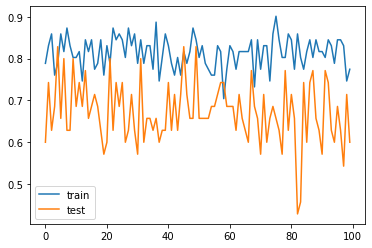

In [296]:
plt.plot(tracc,label='train')
plt.plot(teacc,label='test')
plt.legend()

In [297]:
np.mean(teacc)

0.6711428571428572

In [298]:
np.mean(tracc)

0.8142253521126761

In [299]:
min(teacc)

0.42857142857142855

In [300]:
min(tracc)

0.704225352112676

In [301]:
np.std(teacc)

0.07233651518127918

(array([ 2.,  0.,  1.,  5., 10., 36., 14., 20.,  5.,  7.]),
 array([0.42857143, 0.46857143, 0.50857143, 0.54857143, 0.58857143,
        0.62857143, 0.66857143, 0.70857143, 0.74857143, 0.78857143,
        0.82857143]),
 <BarContainer object of 10 artists>)

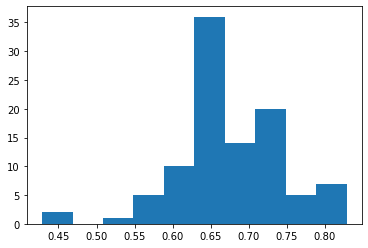

In [302]:
plt.hist(teacc)